# Tests and some results on spin relaxation time

The results and tests presented here are related to the code stored in:
    
* `../code/spin_relaxation.py`
* `../code/builders_with_magnetic_field.py`

### Import python packages

In [1]:
import sys
import kwant
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

### Import local modules

In [2]:
sys.path.insert(1, "../code/")
import builders_with_magnetic_field as bm
import spin_relaxation as sr

### Plot formatting

In [3]:
# FONT_LABELS = 20
# font = {'family' : 'serif', 'weight' : 'bold', 'size': FONT_LABELS}
# font = {'size': FONT_LABELS}
# mpl.rc('font', **font)
# plt.rc('text', usetex=True)

## Tests: `smatrix`

In [4]:
## DEFINE THE STRIP
system_width  = 20
system_length = 10
shape = bm.Rectangle(width=system_width, length=system_length, pbc=True)

# Build the scattering region:
system = bm.make_graphene_strip(bm.graphene, shape)

# Make the leads:
leads  = bm.make_graphene_leads(bm.graphene, shape)

# Attach the leads:
for lead in leads:
    system.attach_lead(lead)

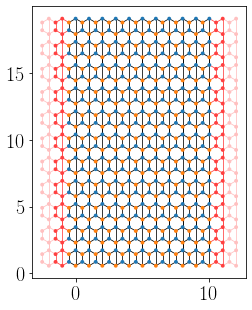

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
kwant.plot(system, ax=ax);
ax.set_aspect('equal')

In [6]:
1/(len([site for site in system.sites()])*2) *1e6

1033.0578512396694

In [7]:
system_length * system_width * 2

400

In [8]:
fsyst = system.finalized()

In [16]:
syst_params = dict(V=0,   # on-site C-atoms
                    t=2.6, # hoppings C-atoms
                    phi=0, # PBC hopping phase
                    lambda_iso = 0, # intrinsic soc (nnn-hoppings)
                    B=0,
                    peierls=bm.peierls_scatter,
                    peierls_lead_L=bm.peierls_lead_L,
                    peierls_lead_R=bm.peierls_lead_R,
                    peierls_pbc=bm.peierls_pbc,
                    peierls_pbc_L=bm.peierls_pbc_L,
                    peierls_pbc_R=bm.peierls_pbc_R,
                    x_Binf=0,
                    x_Bsup=10,                   
                )

In [17]:
# momenta = np.linspace(-np.pi, np.pi, 101)
# syst_params['phi'] = 0 * (2 * np.pi)
# kwant.plotter.bands(fsyst.leads[0], momenta=momenta, params=syst_params);

## Sometimes there is no propagating modes

In [18]:
energy_test = 0.2
smatrix = kwant.smatrix(system.finalized(), energy_test, params=syst_params)

In [19]:
smatrix.num_propagating(0)

4

In [20]:
import spin_relaxation as sr

In [21]:
T_sz, R_sz = sr.calculate_sz_matrices(smatrix)

In [22]:
T_sz

[array([[-4.27336127e-01+9.04092824e-01j, -1.25218326e-14+1.40215345e-14j],
        [ 2.53391048e-15+4.47444149e-15j,  5.69132389e-02+9.98379128e-01j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]),
 array([[-4.27336127e-01+9.04092824e-01j, -1.15812480e-14+1.11085331e-14j],
        [ 4.57522125e-14+2.47237758e-14j,  5.69132389e-02+9.98379128e-01j]])]

## How to check dynamically the number of orbitals

This is important when we have to define the `conservation_law` for the leads. If we're working with electronic spins but without impurities with magnetic moment, the conservation law will be given by $-\sigma_z$:

$$
-\sigma_z = 
\begin{bmatrix}
    -1 &   \\
       & 1 
\end{bmatrix}
$$

On the other hand, when the magnetic moment is take into account we need a conservation law defined by a matrix of the form

$$
\tilde{\Sigma} = 
\begin{bmatrix}
    a &   &   &   \\
      & b &   &   \\
      &   & c &   \\
      &   &   & d
\end{bmatrix}
$$
where $a < b < c < d $, for example:

$$
\tilde{\Sigma} = 
\begin{bmatrix}
    1 &   &   &   \\
      & 2 &   &   \\
      &   & 3 &   \\
      &   &   & 4
\end{bmatrix}
$$

In [23]:
np.diag(np.linspace(1,4,4))

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 4.]])

In [24]:
type(bm.graphene)

kwant.lattice.Polyatomic

In [25]:
dir(bm.graphene)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_prim_vecs',
 'neighbors',
 'prim_vecs',
 'reduced_vecs',
 'shape',
 'sublattices',
 'transf',
 'vec',
 'voronoi',
 'wire']

In [26]:
bm.A.norbs

2

In [27]:
def silly_sum(a: int, b: int) -> int:
    return a + b

In [28]:
silly_sum(2,5)

7

In [29]:
energy  = 0.4
smatrix = kwant.smatrix(system.finalized(), energy, params=syst_params)

In [30]:
S_up_up = smatrix.submatrix((1,0),(0,0))

In [31]:
S_up_up.round(3)

array([[-0.983+0.185j,  0.   +0.j   ],
       [ 0.   -0.j   ,  0.571+0.821j]])

In [32]:
la.norm(S_up_up)**2

1.9999999999999771

In [33]:
smatrix.transmission((1,0),(0,0))

1.9999999999999771

## Results

In [3]:
data = np.load("../results/spin_relaxation_times_hydrogenated_20_phases_test_total.npz")

In [4]:
energies = data['energies']
tau_sx = data['tau_sx']
tau_sy = data['tau_sy']
tau_sz = data['tau_sz']

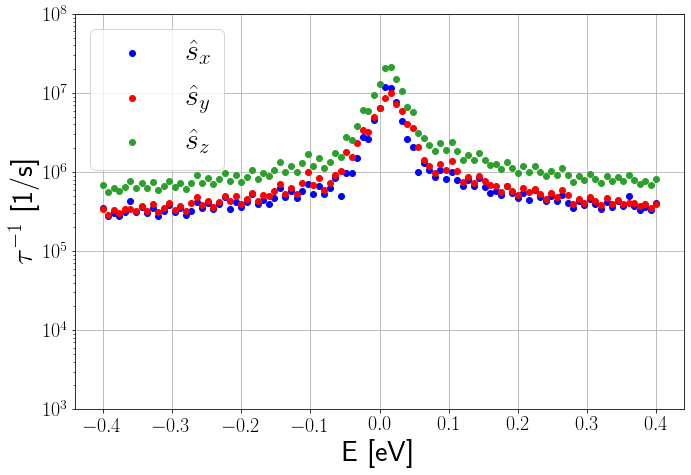

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies, tau_sx, 'o', c='b', label=r'$\hat{s}_x$')
ax.plot(energies, tau_sy, 'o', c='r', label=r'$\hat{s}_y$')
ax.plot(energies, tau_sz, 'o', c='C2', label=r'$\hat{s}_z$')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_total.png")
plt.show()

In [38]:
data_iso = np.load("../results/spin_relaxation_times_hydrogenated_20_phases_test_only_ISO.npz")
energies_iso = data_iso['energies']
tau_sx_iso = data_iso['tau_sx']
tau_sy_iso = data_iso['tau_sy']
tau_sz_iso = data_iso['tau_sz']

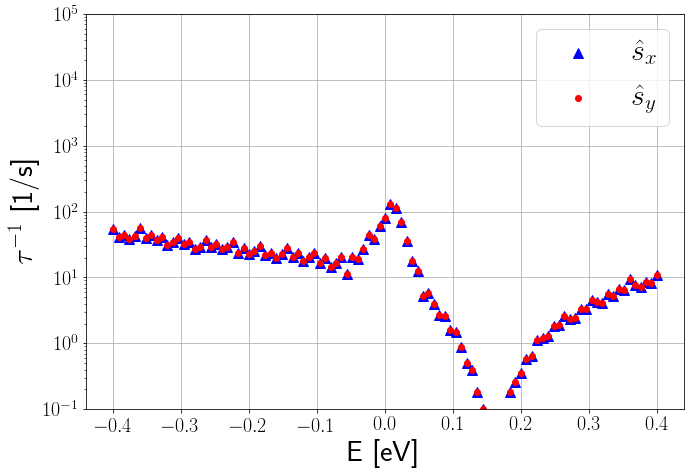

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies_iso, tau_sx_iso, '^', color='b', markersize=10, label=r'$\hat{s}_x$')
ax.plot(energies_iso, tau_sy_iso, 'o', color='r', label=r'$\hat{s}_y$')
# ax.plot(energies, tau_sz, '+', markersize=10, label=r'$\hat{s}_z$')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e-1,1e5)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_iso.png")
plt.show()

In [40]:
data_br = np.load("../results/spin_relaxation_times_hydrogenated_20_phases_test_only_BR.npz")
energies_br = data_br['energies']
tau_sx_br = data_br['tau_sx']
tau_sy_br = data_br['tau_sy']
tau_sz_br = data_br['tau_sz']

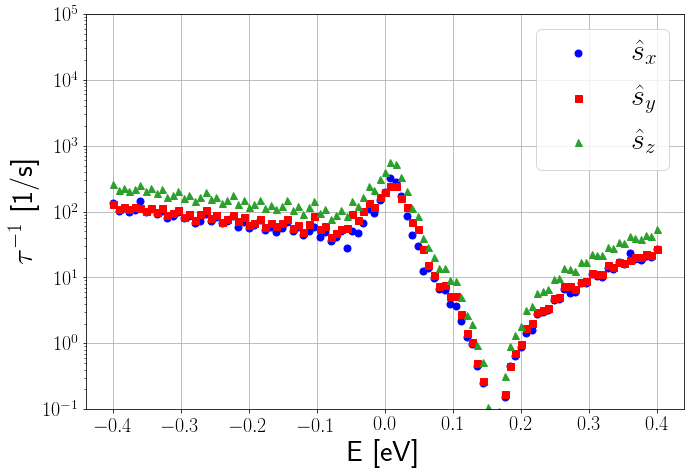

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies_br, tau_sx_br, 'o', c='b', markersize=7, label=r'$\hat{s}_x$')
ax.plot(energies_br, tau_sy_br, 's', c='r', markersize=7, label=r'$\hat{s}_y$')
ax.plot(energies_br, tau_sz_br, '^', c='C2', markersize=7, label=r'$\hat{s}_z$')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e-1,1e5)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_br.png")
plt.show()

In [42]:
data_pia = np.load("../results/spin_relaxation_times_hydrogenated_20_phases_test_only_PIA.npz")
energies_pia = data_pia['energies']
tau_sx_pia = data_pia['tau_sx']
tau_sy_pia = data_pia['tau_sy']
tau_sz_pia = data_pia['tau_sz']

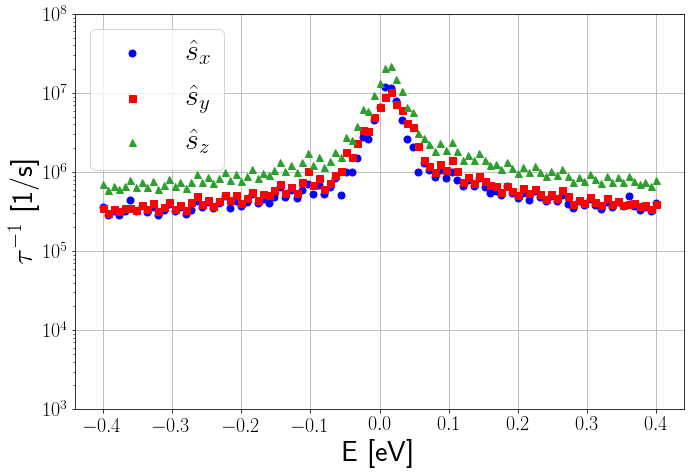

In [43]:
fig, ax = plt.subplots(figsize=(10,7))
# ax.plot(energies, tau_sx, '-', c='gray', label=r'total')
ax.plot(energies_pia, tau_sx_pia, 'o', c='b', markersize=7, label=r'$\hat{s}_x$')
ax.plot(energies_pia, tau_sy_pia, 's', c='r', markersize=7, label=r'$\hat{s}_y$')
ax.plot(energies_pia, tau_sz_pia, '^', c='C2', markersize=7, label=r'$\hat{s}_z$')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

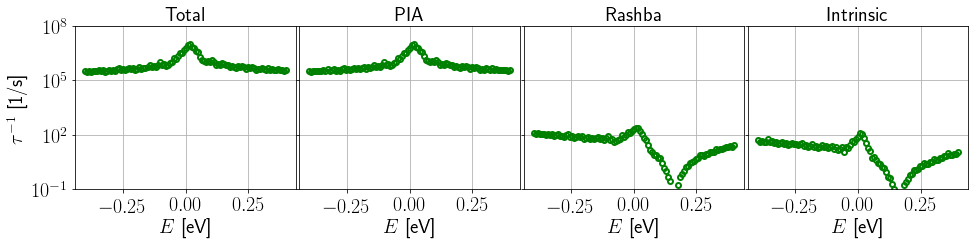

In [101]:
fig = plt.figure(figsize=(16,3))

grid = ImageGrid(fig, 111,
                axes_pad=0.05,
                label_mode='L',
                aspect=False,
                nrows_ncols=(1,4))

# print(grid)

grid[0].plot(energies, tau_sy, linestyle='', 
             marker='o',
             markersize=5, 
             markeredgewidth=2, 
             fillstyle='none', 
             c='green', label=r'$\hat{s}_y$')
grid[0].set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=20)
grid[0].set_xlabel(r'$E$ [eV]', fontsize=30)
grid[0].set_yscale('log')
grid[0].set_ylim(1e-1,1e8)

grid[1].plot(energies_pia, tau_sy_pia, linestyle='',
             marker='o',
             markersize=5, 
             markeredgewidth=2, 
             fillstyle='none', 
             c='green', label=r'$\hat{s}_y$')

grid[2].plot(energies_br, tau_sy_br, marker='o',linestyle='',
             markersize=5, 
             markeredgewidth=2, 
             fillstyle='none', 
             c='green', label=r'$\hat{s}_y$')
grid[3].plot(energies_iso, tau_sy_iso,marker='o',linestyle='',
             markersize=5, 
             markeredgewidth=2, 
             fillstyle='none', 
             c='green', label=r'$\hat{s}_y$')

titles = ['Total','PIA','Rashba','Intrinsic']
for ax, title in zip(grid, titles):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(r'$E$ [eV]', fontsize=20)
    ax.grid()

plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_53ppm_comparison.png")
plt.show()

In [109]:
def anisotropy(t_sx, t_sy, t_sz):
    avg_in_plane = (t_sx + t_sy)/2
    out_of_plane = t_sz
    return out_of_plane / avg_in_plane

In [110]:
## CALCULATE THE ANISOTROPY 
anisotropy_total = anisotropy(tau_sx, tau_sy, tau_sz)
anisotropy_pia = anisotropy(tau_sx_pia, tau_sy_pia, tau_sz_pia)
anisotropy_rashba =anisotropy(tau_sx_br,  tau_sy_br,  tau_sz_br)

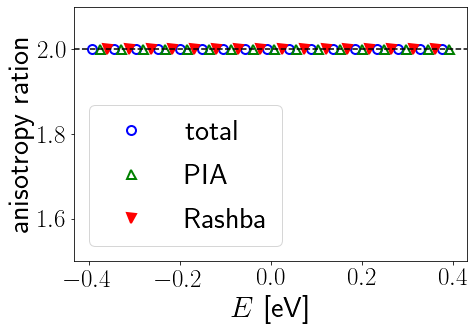

In [153]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(energies[1::6], anisotropy_total[1::6], 'o', c='blue', markersize=9, 
        fillstyle='none', markeredgewidth=2, label=r'total')
ax.plot(energies[3::6], anisotropy_pia[3::6], '^', c='green', markersize=9, 
        fillstyle='none', markeredgewidth=2, label=r'PIA')
ax.plot(energies[5::6], anisotropy_rashba[5::6], 'v', c='red', markersize=9, 
        fillstyle='full', markeredgewidth=2, label=r'Rashba')
ax.axhline(y=2, linestyle='--', c='k')
ax.tick_params(labelsize=25)
ax.set_ylim(1.5,2.1)
ax.set_ylabel('anisotropy ration', fontsize=30)
ax.set_xlabel(r'$E$ [eV]', fontsize=30)
ax.legend(fontsize=30)
plt.tight_layout()
plt.savefig('../images/anisotropy_spin_relaxation_time.png')
plt.show()

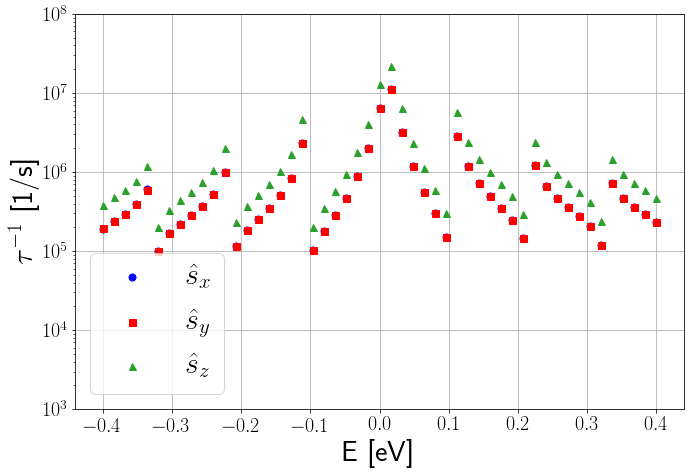

In [46]:
data_fast_test = np.load('../results/spin_relaxation_times_hydrogenated_fast_test.npz')
energies_fast = data_fast_test['energies']
tau_sx_fast = data_fast_test['tau_sx']
tau_sy_fast = data_fast_test['tau_sy']
tau_sz_fast = data_fast_test['tau_sz']

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies_fast, tau_sx_fast, 'o', c='b', markersize=7, label=r'$\hat{s}_x$')
ax.plot(energies_fast, tau_sy_fast, 's', c='r', markersize=7, label=r'$\hat{s}_y$')
ax.plot(energies_fast, tau_sz_fast, '^', c='C2', markersize=7, label=r'$\hat{s}_z$')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
plt.show()

## Test with magnetic impurity without exchange

In [47]:
data_test_mag_impurity_no_exchange = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_1_phase.npz")

In [48]:
energies_mag = data_test_mag_impurity_no_exchange['energies']
tau_sz_mag = data_test_mag_impurity_no_exchange['tau_sz']

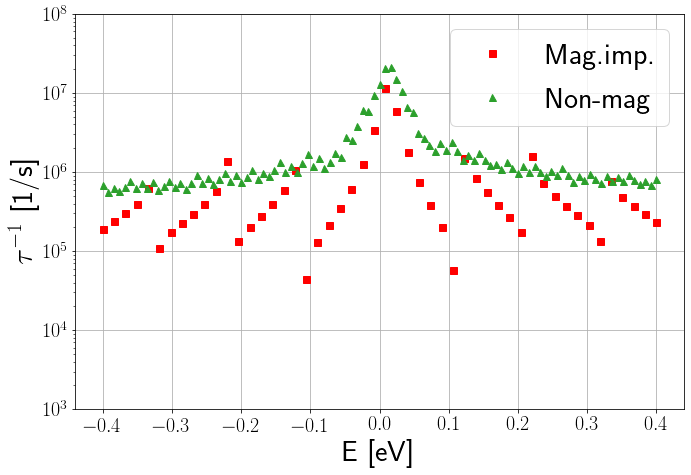

In [49]:
fig, ax = plt.subplots(figsize=(10,7))
# ax.plot(energies, tau_sx, '-', c='gray', label=r'total')
ax.plot(energies_mag, tau_sz_mag, 's', c='r', markersize=7, label=r'Mag.imp.')
ax.plot(energies, tau_sz, '^', c='C2', markersize=7, label=r'Non-mag')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

In [50]:
data_mag_impurity_no_exchange = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_20_phases.npz")

In [51]:
energies_mag_20 = data_mag_impurity_no_exchange['energies']
tau_sz_mag_20 = data_mag_impurity_no_exchange['tau_sz']

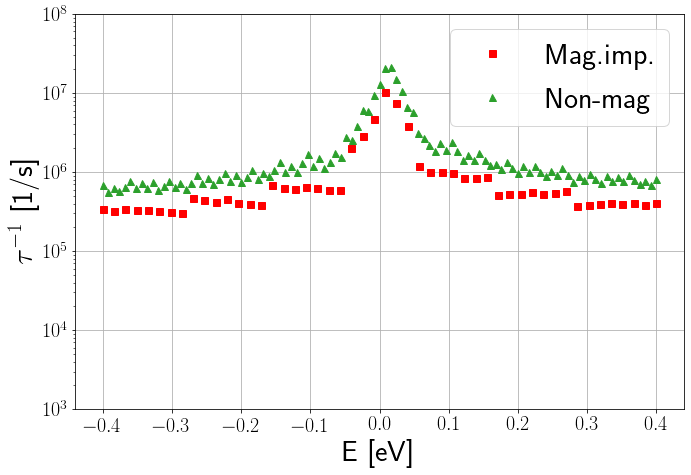

In [52]:
fig, ax = plt.subplots(figsize=(10,7))
# ax.plot(energies, tau_sx, '-', c='gray', label=r'total')
ax.plot(energies_mag_20, tau_sz_mag_20, 's', c='r', markersize=7, label=r'Mag.imp.')
ax.plot(energies, tau_sz, '^', c='C2', markersize=7, label=r'Non-mag')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

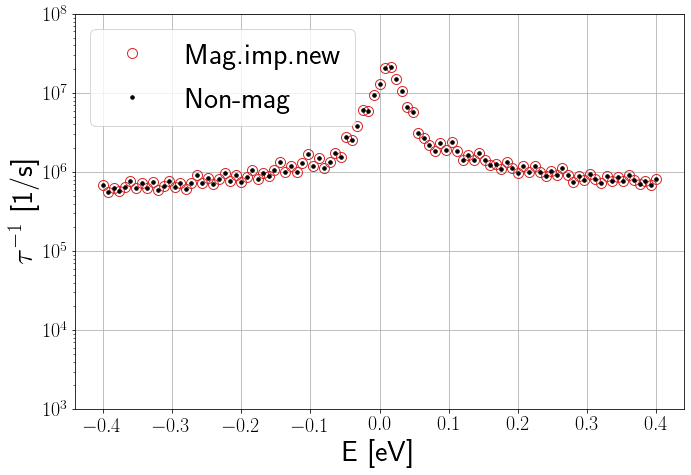

In [53]:
data_mag_impurity_no_exchange_new = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_20_phases_new.npz")
energies_mag_20_new = data_mag_impurity_no_exchange_new['energies']
tau_sz_mag_20_new = data_mag_impurity_no_exchange_new['tau_sz']

fig, ax = plt.subplots(figsize=(10,7))
# ax.plot(energies, tau_sx, '-', c='gray', label=r'total')
# ax.plot(energies_mag_20, tau_sz_mag_20, 's', c='r', markersize=7, label=r'Mag.imp.')
ax.plot(energies_mag_20_new, tau_sz_mag_20_new, 'o', c='C3', markersize=10, fillstyle='none', label=r'Mag.imp.new')
ax.plot(energies, tau_sz, '.', c='k', markersize=7, markevery=1, label=r'Non-mag')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

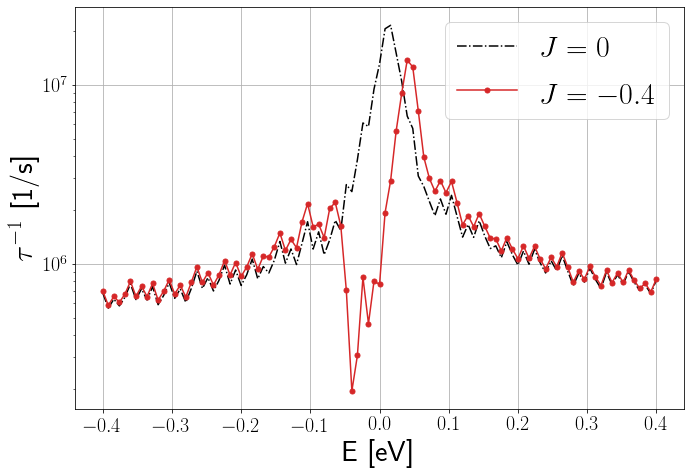

In [54]:
data_mag_impurity_exchange = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_20_phases_exchange_0,4.npz")
energies_mag_20_exchange = data_mag_impurity_exchange['energies']
tau_sz_mag_20_exchange = data_mag_impurity_exchange['tau_sz']

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies_mag_20_new, tau_sz_mag_20_new, '-.', c='k', label=r'$J=0$')
# ax.plot(energies, tau_sz, '.', c='k', markersize=7, markevery=1, label=r'Non-mag')
ax.plot(energies_mag_20_exchange, tau_sz_mag_20_exchange, '-o', c='C3', markersize=5, label=r'$J=-0.4$')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
# ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

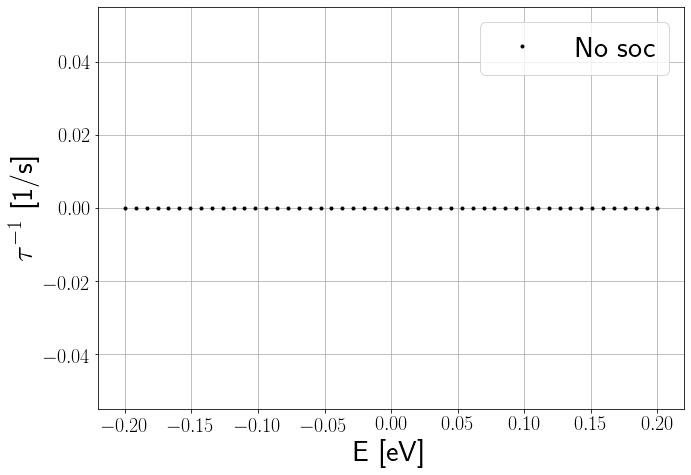

In [55]:
data_no_soc = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_20_phases_exchange_0,4_test_without_soc.npz")
energies_test = data_no_soc['energies']
tau_sz_test = data_no_soc['tau_sz']

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies_test, tau_sz_test, '.', c='k', label=r'No soc')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
# ax.set_yscale('log')
# ax.set_ylim(1e3,1e8)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

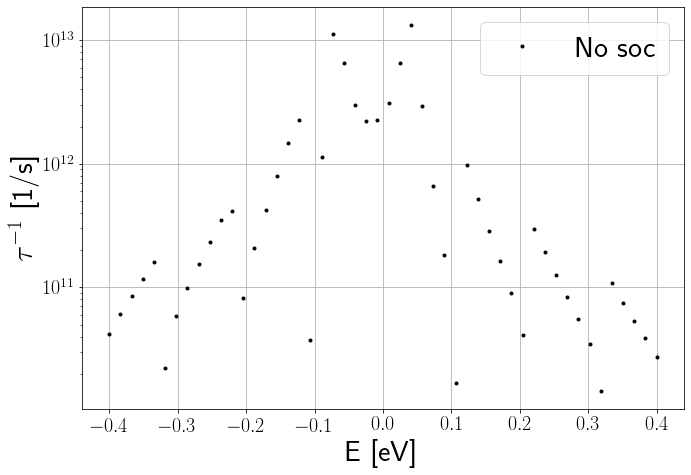

In [56]:
data_no_soc = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_1_phase_test_both_spin_flips.npz")
energies_test = data_no_soc['energies']
tau_sz_test = data_no_soc['tau_sz']

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(energies_test, tau_sz_test, '.', c='k', label=r'No soc')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
# ax.set_ylim(1e3,1e13)
ax.grid()
ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_pia.png")
plt.show()

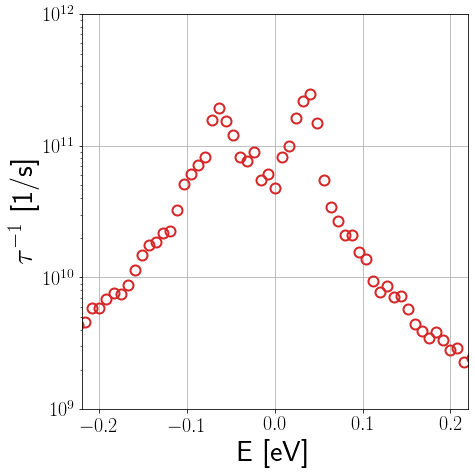

In [102]:
data_no_soc = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_20_phase_test_both_spin_flips.npz")
energies_test = data_no_soc['energies']
tau_sz_test = data_no_soc['tau_sz']/53

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(energies_test, tau_sz_test, 'o', c='C3', markersize=10, markeredgewidth=2, fillstyle='none', label=r'No soc')
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e9,1e12)
ax.set_xlim(-0.22,0.22)
ax.grid()
# ax.legend(fontsize=30)
plt.tight_layout()
# plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_1ppm_with_magnetic_adatom.png")
plt.show()

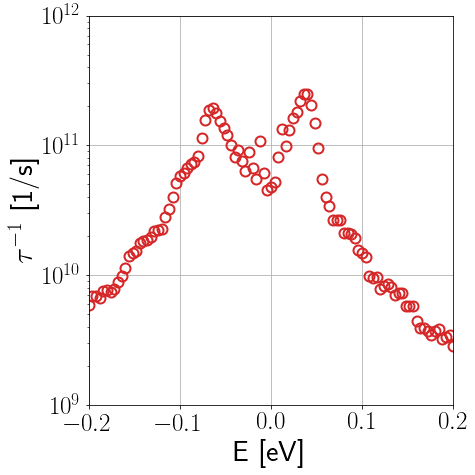

In [107]:
data_no_soc = np.load("../results/spin_relaxation_magnetic_moment_times_hydrogenated_20_phase_range_0,2_both_spin_flips.npz")
energies_test = data_no_soc['energies']
tau_sz_test = data_no_soc['tau_sz']/53

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(energies_test, tau_sz_test, 'o', c='C3', 
        markersize=10, markeredgewidth=2, fillstyle='none', label=r'No soc')
ax.tick_params(labelsize=25)
ax.set_xlabel(r'E [eV]', fontsize=30)
ax.set_ylabel(r'$\tau^{-1}$ [1/s]', fontsize=30)
ax.set_yscale('log')
ax.set_ylim(1e9,1e12)
ax.set_xlim(-.2,.2)
ax.grid()
# ax.legend(fontsize=30)
plt.tight_layout()
plt.savefig("../images/spin_relaxation_hydrogenated_graphene_130_62_1ppm_with_magnetic_adatom.png")
plt.show()

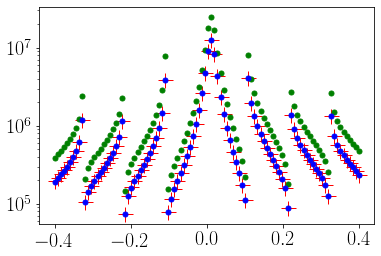

In [59]:
data_new_y = np.load("../results/spin_relaxation_times_hydrogenated_1_phase_total.npz")
energies_new_y = data_new_y['energies']
tau_sx_new_y = data_new_y['tau_sx']
tau_sy_new_y = data_new_y['tau_sy']
tau_sz_new_y = data_new_y['tau_sz']

fig, ax = plt.subplots()
ax.plot(energies_new_y, tau_sy_new_y, '+', markersize=15, c='r')
ax.plot(energies_new_y, tau_sz_new_y, '.', markersize=10, c='g')
ax.plot(energies_new_y, tau_sx_new_y, '.', markersize=10, c='b')
ax.set_yscale('log')
# ax.set_ylim(1e-2,1e7)
plt.show()

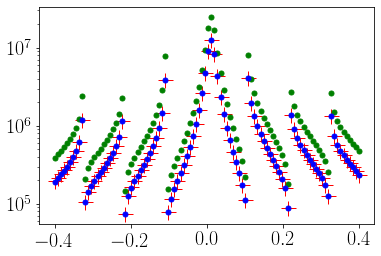

In [60]:
data_new_y = np.load("../results/spin_relaxation_times_hydrogenated_1_phase_test_total.npz")
energies_new_y = data_new_y['energies']
tau_sx_new_y = data_new_y['tau_sx']
tau_sy_new_y = data_new_y['tau_sy']
tau_sz_new_y = data_new_y['tau_sz']

fig, ax = plt.subplots()
ax.plot(energies_new_y, tau_sy_new_y, '+', markersize=15, c='r')
ax.plot(energies_new_y, tau_sz_new_y, '.', markersize=10, c='g')
ax.plot(energies_new_y, tau_sx_new_y, '.', markersize=10, c='b')
ax.set_yscale('log')
# ax.set_ylim(1e-2,1e7)
plt.show()

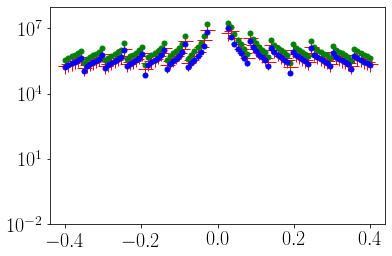

In [61]:
data_new_y = np.load("../results/spin_relaxation_times_hydrogenated_pi_phase_test_total.npz")
energies_new_y = data_new_y['energies']
tau_sx_new_y = data_new_y['tau_sx']
tau_sy_new_y = data_new_y['tau_sy']
tau_sz_new_y = data_new_y['tau_sz']

fig, ax = plt.subplots()
ax.plot(energies_new_y, tau_sy_new_y, '+', markersize=15, c='r')
ax.plot(energies_new_y, tau_sz_new_y, '.', markersize=10, c='g')
ax.plot(energies_new_y, tau_sx_new_y, '.', markersize=10, c='b')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e8)
plt.show()

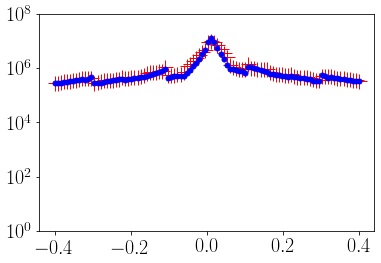

In [62]:
data_new_y = np.load("../results/spin_relaxation_times_hydrogenated_15_phases_test_total.npz")
energies_new_y = data_new_y['energies']
tau_sx_new_y = data_new_y['tau_sx']
tau_sy_new_y = data_new_y['tau_sy']
tau_sz_new_y = data_new_y['tau_sz']

fig, ax = plt.subplots()
ax.plot(energies_new_y, tau_sy_new_y, '+', markersize=15, c='r')
# ax.plot(energies_new_y, tau_sz_new_y, '.', markersize=10, c='g')
ax.plot(energies_new_y, tau_sx_new_y, '.', markersize=10, c='b')
ax.set_yscale('log')
ax.set_ylim(1,1e8)
plt.show()

In [63]:
smallest_magnitude = min(np.abs(energies_new_y))

In [64]:
np.where(np.abs(energies_new_y) == smallest_magnitude)

(array([50]),)

In [65]:
tau_sx_new_y[50]

9010513.31963385